<a href="https://colab.research.google.com/github/k-chanez/Churn-prediction/blob/zira-dev/Projetcloud1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chargement de données**

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# Chemin vers le fichier Excel sur Google Drive
chemin_fichier = '/content/drive/MyDrive/E Commerce Datasett.xlsx'

# Charger le fichier Excel dans un DataFrame pandas
df = pd.read_excel(chemin_fichier)

# Afficher l'intégralité du DataFrame sans limiter le nombre de lignes affichées
pd.set_option('display.max_rows', None)



In [97]:
df.shape

(5630, 20)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [99]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

**Pré-traitement**

In [100]:
# Identifier les valeurs manquantes
missing_values = df.isnull().sum()


In [101]:
# Supprimer les duplicatas
df = df.drop_duplicates()

In [102]:
# Gérer les valeurs aberrantes, convertir les types de données, gérer les catégories, etc.

# Remplacement des valeurs manquantes (exemple avec la moyenne)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean(), inplace=True)
df['CouponUsed'].fillna(0, inplace=True)  # Remplacer par 0 si applicable


In [103]:
import pandas as pd

# Charger le jeu de données nettoyé
df = pd.read_csv('jeu_de_donnees_nettoye.csv')

# Afficher les premières lignes du jeu de données (par défaut, les 5 premières lignes)
print(df.head())


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

In [104]:
# Sauvegarder le jeu de données nettoyé
df.to_csv('jeu_de_donnees_nettoye.csv', index=False)

**Visualisation et explication des resultats**

<ipython-input-105-da6b3fdcfc92>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



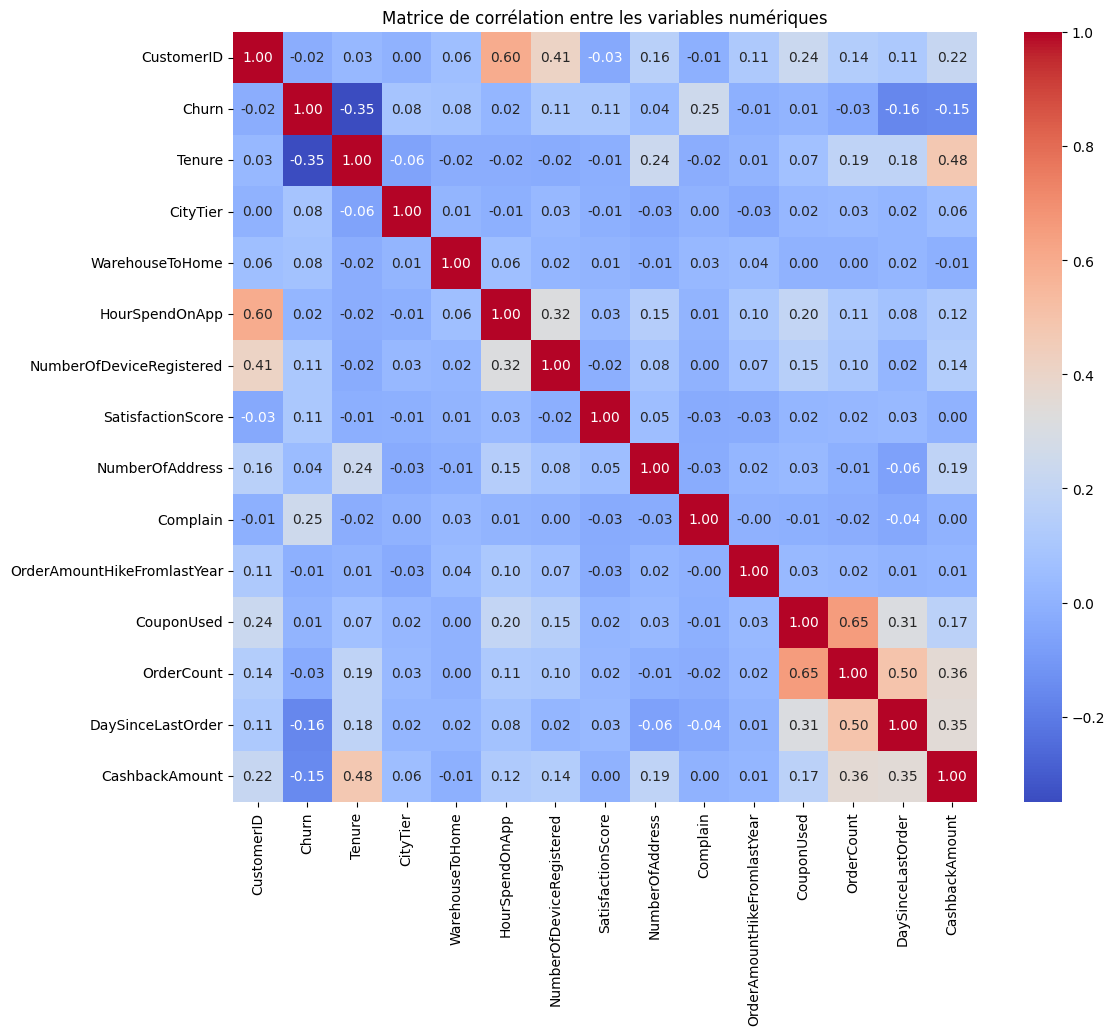

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Visualisation de la matrice de corrélation avec un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()


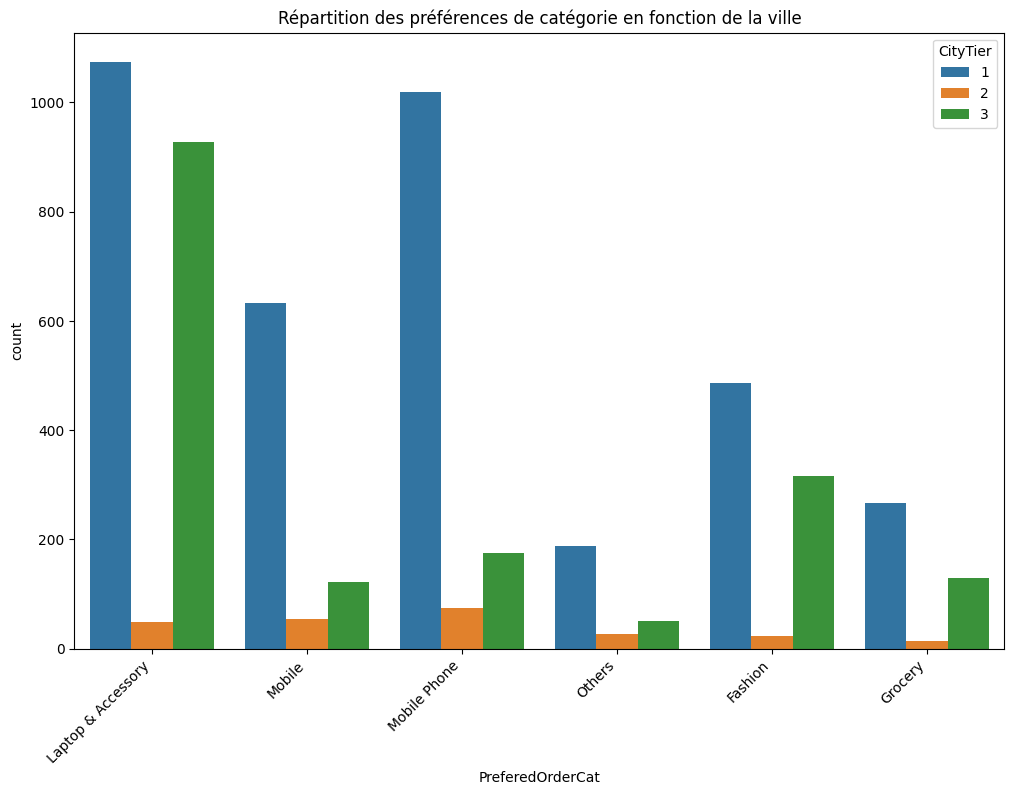

In [106]:
# Répartition des préférences de catégorie en fonction de la ville
plt.figure(figsize=(12, 8))
sns.countplot(x='PreferedOrderCat', hue='CityTier', data=df)
plt.title('Répartition des préférences de catégorie en fonction de la ville')
plt.xticks(rotation=45, ha='right')
plt.show()


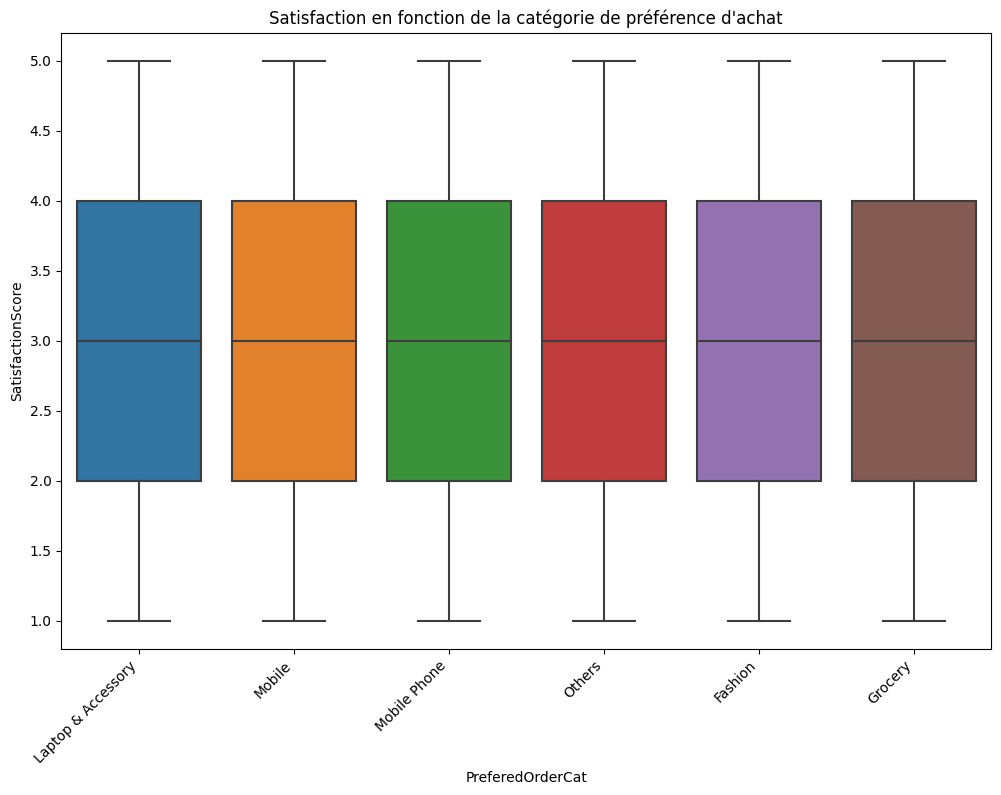

In [107]:
# Visualisation de la satisfaction en fonction de la catégorie de préférence d'achat
plt.figure(figsize=(12, 8))
sns.boxplot(x='PreferedOrderCat', y='SatisfactionScore', data=df)
plt.title('Satisfaction en fonction de la catégorie de préférence d\'achat')
plt.xticks(rotation=45, ha='right')
plt.show()


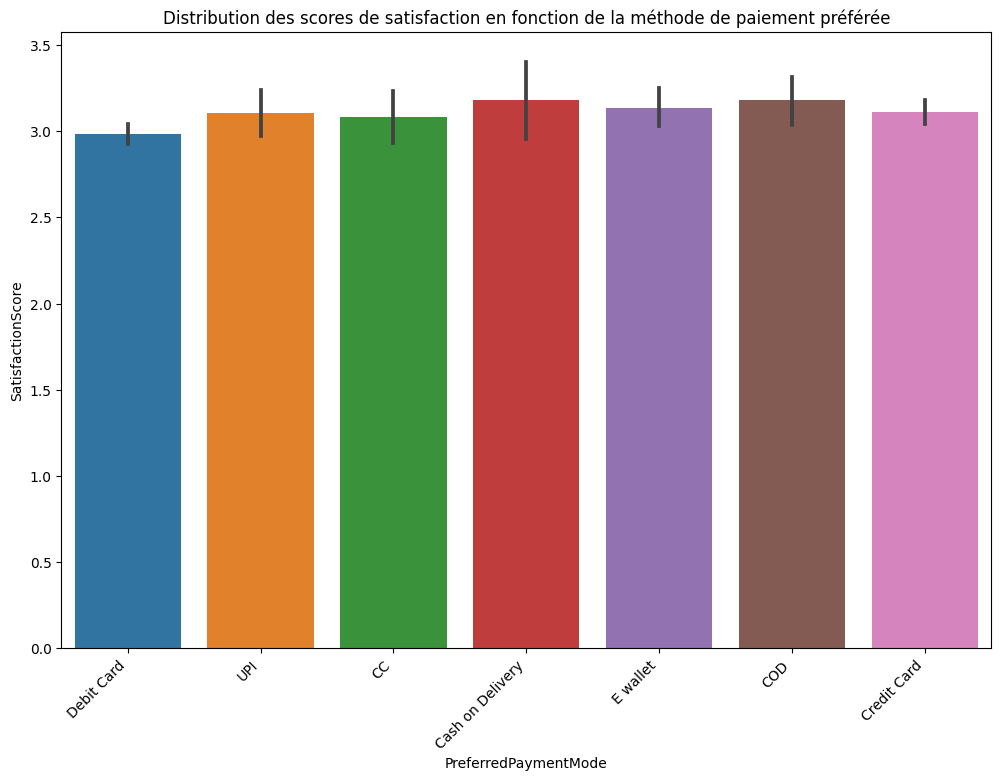

In [108]:
# Distribution des scores de satisfaction en fonction de la méthode de paiement préférée
plt.figure(figsize=(12, 8))
sns.barplot(x='PreferredPaymentMode', y='SatisfactionScore', data=df)
plt.title('Distribution des scores de satisfaction en fonction de la méthode de paiement préférée')
plt.xticks(rotation=45, ha='right')
plt.show()


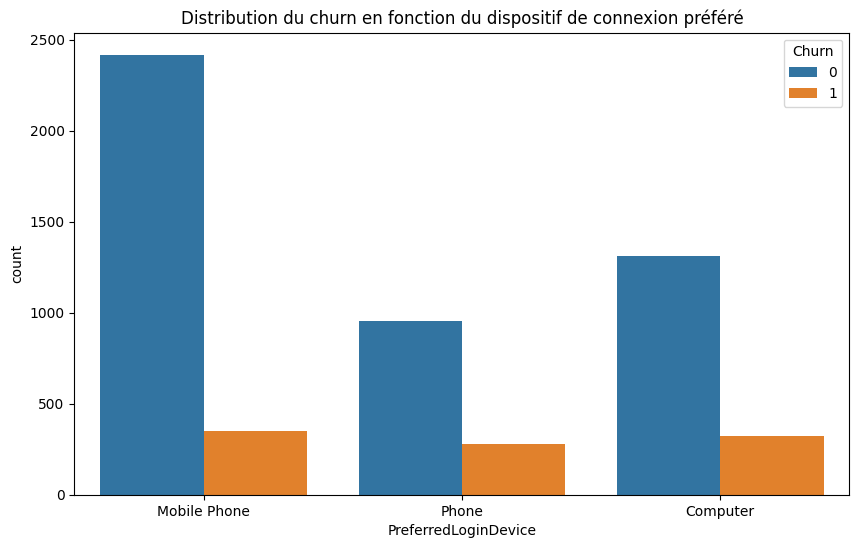

In [109]:
# Visualisation du churn en fonction du dispositif de connexion préféré
plt.figure(figsize=(10, 6))
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df)
plt.title('Distribution du churn en fonction du dispositif de connexion préféré')
plt.show()


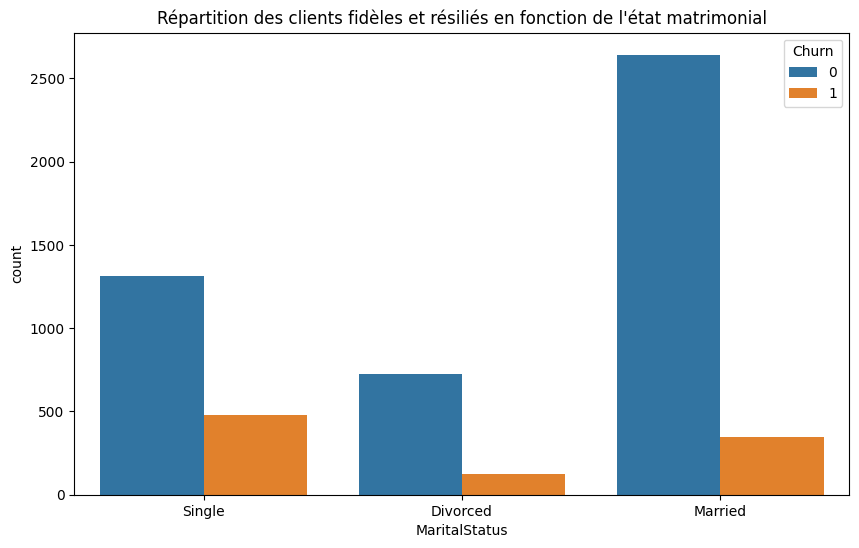

In [110]:
# Répartition des clients fidèles et résiliés en fonction de l'état matrimonial
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Churn', data=df)
plt.title('Répartition des clients fidèles et résiliés en fonction de l\'état matrimonial')
plt.show()


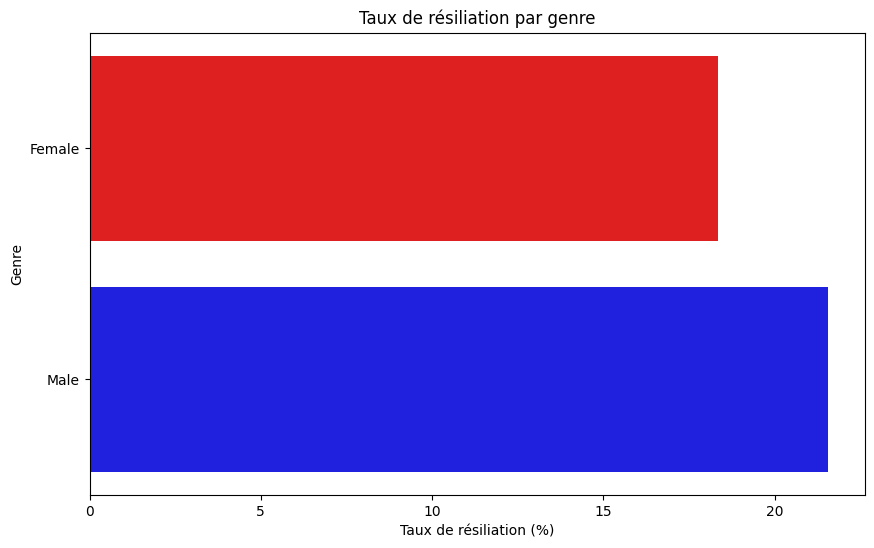

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul des taux de résiliation par genre
female_churn_rate = round(348 / 1898 * 100, 2)
male_churn_rate = round(600 / 2784 * 100, 2)

# Création d'un DataFrame pour la visualisation
churn_data = pd.DataFrame({
    'Gender': ['Female', 'Male'],
    'Churn Rate': [female_churn_rate, male_churn_rate]
})

# Création d'un diagramme en barres horizontales empilées
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn Rate', y='Gender', data=churn_data, palette=['red', 'blue'])
plt.title('Taux de résiliation par genre')
plt.xlabel('Taux de résiliation (%)')
plt.ylabel('Genre')
plt.show()



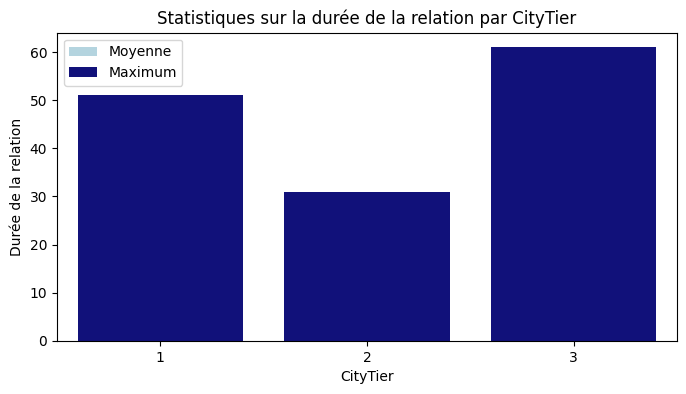

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Groupe par CityTier et calcul des statistiques sur Tenure
df_grouped_tenure = df.groupby('CityTier')['Tenure'].agg(['mean', 'max']).reset_index()

# Création d'un diagramme en barres horizontales empilées plus compact
plt.figure(figsize=(8, 4))
sns.barplot(x='CityTier', y='mean', data=df_grouped_tenure, color='lightblue', label='Moyenne')
sns.barplot(x='CityTier', y='max', data=df_grouped_tenure, color='darkblue', label='Maximum')
plt.title('Statistiques sur la durée de la relation par CityTier')
plt.xlabel('CityTier')
plt.ylabel('Durée de la relation')
plt.legend()
plt.show()



In [136]:
import plotly.express as px

# Groupe par CityTier et calcul des statistiques sur OrderCount
df_grouped_OrderCount = df.groupby('CityTier')['OrderCount'].agg(['mean', 'max', 'std']).reset_index()

# Création du diagramme en nuage de points avec bandes d'erreur
fig_OrderCount_error = px.scatter(df_grouped_OrderCount, x='CityTier', y='mean',
                                  error_y='std',
                                  labels={'mean': 'Moyenne', 'max': 'Maximum', 'std': 'Écart type'},
                                  title='Statistiques sur le nombre de commandes par CityTier')

# Ajustement de la taille du diagramme
fig_OrderCount_error.update_layout(height=500, width=600)

# Affichage du diagramme
fig_OrderCount_error.show()




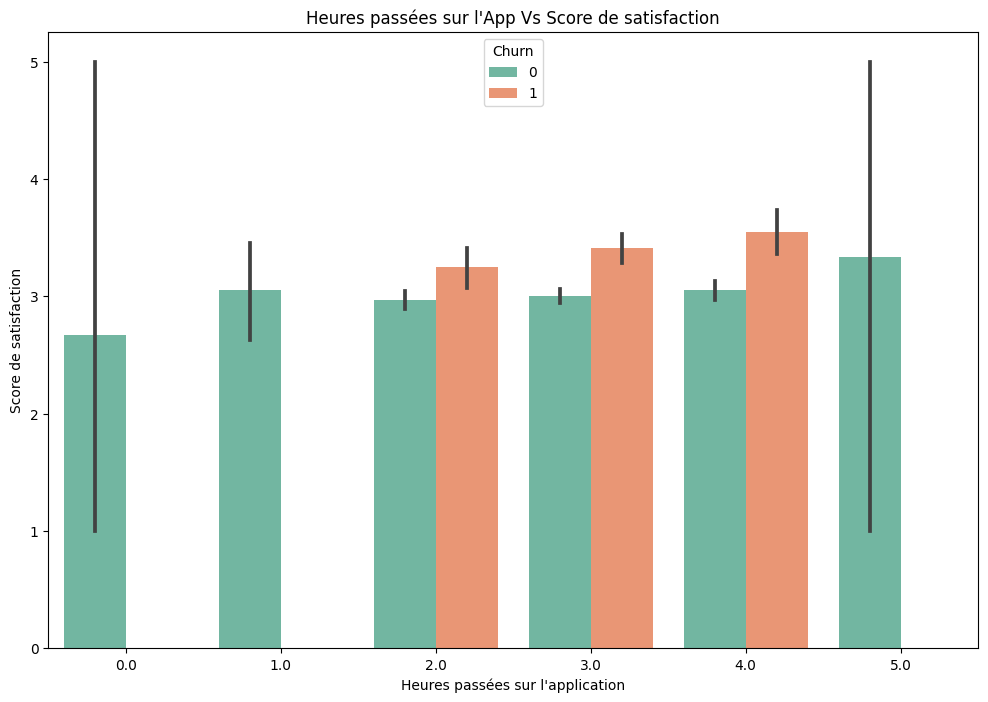

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'un diagramme en barres horizontales empilées pour la relation entre le temps passé sur l'application, le score de satisfaction et le churn
plt.figure(figsize=(12, 8))
sns.barplot(x='HourSpendOnApp', y='SatisfactionScore', hue='Churn', data=df, palette='Set2')
plt.title("Heures passées sur l'App Vs Score de satisfaction")
plt.xlabel('Heures passées sur l\'application')
plt.ylabel('Score de satisfaction')
plt.show()



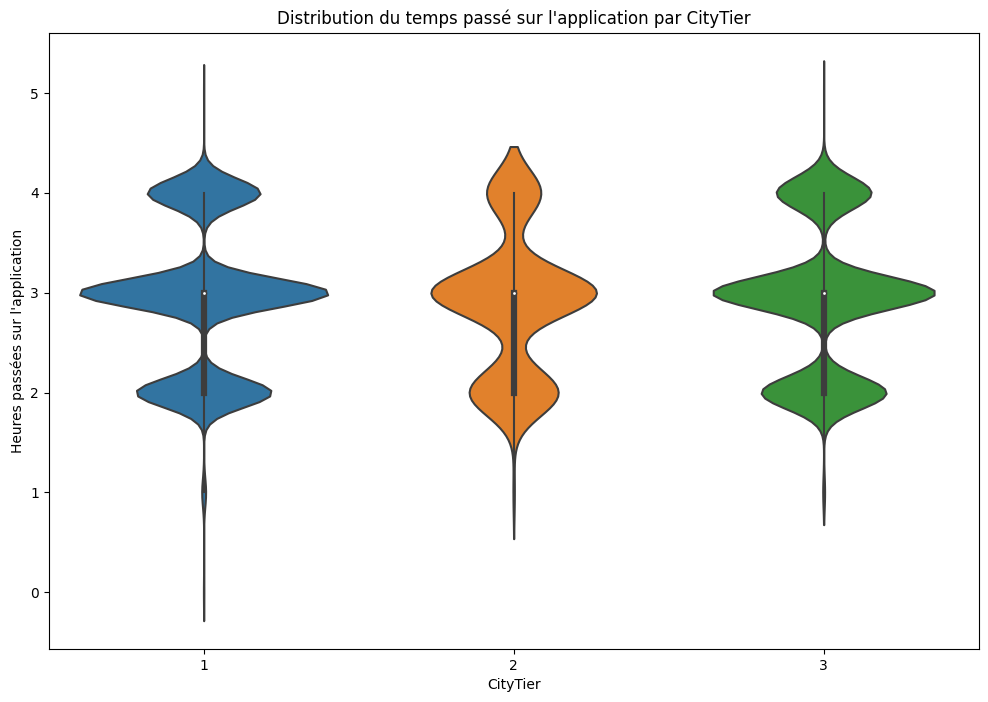

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'un diagramme à violons pour visualiser la distribution du temps passé sur l'application par CityTier
plt.figure(figsize=(12, 8))
sns.violinplot(x='CityTier', y='HourSpendOnApp', data=df)
plt.title('Distribution du temps passé sur l\'application par CityTier')
plt.xlabel('CityTier')
plt.ylabel('Heures passées sur l\'application')
plt.show()


**Entrainement du modele**

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Supprimer les lignes avec des valeurs manquantes pour éviter les problèmes lors de l'entraînement
df.dropna(inplace=True)
import pandas as pd

# Supposons que 'data' est votre DataFrame et 'colonne_string' est la colonne à encoder
df= pd.get_dummies(df, columns=['PreferredLoginDevice'])
df= pd.get_dummies(df, columns=['PreferredPaymentMode'])
df= pd.get_dummies(df, columns=['Gender'])
df= pd.get_dummies(df, columns=['PreferedOrderCat'])
df= pd.get_dummies(df, columns=['MaritalStatus'])
# Séparer les fonctionnalités (X) et la variable cible (y)
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Diviser le jeu de données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Afficher la taille des ensembles d'entraînement, de validation et de test
print(f'Taille de l\'ensemble d\'entraînement : {len(X_train)}')
print(f'Taille de l\'ensemble de validation : {len(X_val)}')
print(f'Taille de l\'ensemble de test : {len(X_test)}')



Taille de l'ensemble d'entraînement : 3006
Taille de l'ensemble de validation : 644
Taille de l'ensemble de test : 645


In [117]:
# Créer et entraîner un modèle RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédire sur l'ensemble de validation
y_val_pred = model.predict(X_val)

# Évaluer les performances du modèle sur l'ensemble de validation
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy sur l\'ensemble de validation : {accuracy:.2f}')

# Afficher le rapport de classification et la matrice de confusion
print('Classification Report:')
print(classification_report(y_val, y_val_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))

Accuracy sur l'ensemble de validation : 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       535
           1       0.91      0.72      0.81       109

    accuracy                           0.94       644
   macro avg       0.93      0.85      0.89       644
weighted avg       0.94      0.94      0.94       644

Confusion Matrix:
[[527   8]
 [ 30  79]]


In [118]:
from sklearn.linear_model import LogisticRegression

# Créer et entraîner un modèle de régression logistique
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Prédire sur l'ensemble de validation
y_val_pred_logistic = logistic_model.predict(X_val, )

# Évaluer les performances du modèle sur l'ensemble de validation
accuracy_logistic = accuracy_score(y_val, y_val_pred_logistic)
print(f'Accuracy sur l\'ensemble de validation : {accuracy_logistic:.2f}')

# Afficher le rapport de classification et la matrice de confusion
print('Classification Report:')
print(classification_report(y_val, y_val_pred_logistic))
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred_logistic))


Accuracy sur l'ensemble de validation : 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       535
           1       0.72      0.28      0.41       109

    accuracy                           0.86       644
   macro avg       0.80      0.63      0.66       644
weighted avg       0.84      0.86      0.83       644

Confusion Matrix:
[[523  12]
 [ 78  31]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [119]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Créer et entraîner un modèle SVM
svm_model = SVC(kernel='linear', random_state=42)
scaler = StandardScaler()

# Appliquer la mise à l'échelle sur les ensembles d'entraînement, de validation et de test
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle SVM sur les données mises à l'échelle
svm_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de validation
y_val_pred_svm = svm_model.predict(X_val_scaled)

# Évaluer les performances du modèle sur l'ensemble de validation
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
print(f'Accuracy sur l\'ensemble de validation : {accuracy_svm:.2f}')

# Afficher le rapport de classification et la matrice de confusion
print('Classification Report:')
print(classification_report(y_val, y_val_pred_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred_svm))


Accuracy sur l'ensemble de validation : 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       535
           1       0.77      0.49      0.60       109

    accuracy                           0.89       644
   macro avg       0.84      0.73      0.77       644
weighted avg       0.88      0.89      0.88       644

Confusion Matrix:
[[519  16]
 [ 56  53]]


In [120]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)
y_val_pred_xgb = model_xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
classification_report_xgb = classification_report(y_val, y_val_pred_xgb)
print("Précision sur l'ensemble de validation (XGBoost) :", accuracy_xgb)
print("Rapport de classification sur l'ensemble de validation (XGBoost) :\n", classification_report_xgb)

Précision sur l'ensemble de validation (XGBoost) : 0.953416149068323
Rapport de classification sur l'ensemble de validation (XGBoost) :
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       535
           1       0.89      0.83      0.86       109

    accuracy                           0.95       644
   macro avg       0.93      0.90      0.91       644
weighted avg       0.95      0.95      0.95       644



In [121]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supprimez les lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Divisez le jeu de données en features (X) et target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Convertissez les étiquettes en type int32
y = y.astype(np.int32)

# Normalisez les données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divisez le jeu de données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Redimensionnez les données pour qu'elles soient compatibles avec LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Initialisez le modèle LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînez le modèle LSTM sur l'ensemble d'entraînement
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Faites des prédictions sur l'ensemble de validation
y_val_pred_lstm = (model_lstm.predict(X_val) > 0.5).astype(np.int32)

# Évaluez les performances sur l'ensemble de validation
accuracy_lstm = accuracy_score(y_val, y_val_pred_lstm)
classification_report_lstm = classification_report(y_val, y_val_pred_lstm)

# Affichez les résultats
print("Précision sur l'ensemble de validation (LSTM) :", accuracy_lstm)
print("Rapport de classification sur l'ensemble de validation (LSTM) :\n", classification_report_lstm)


Epoch 1/50
94/94 [==============================] - 3s 10ms/step - loss: 0.5546 - accuracy: 0.8047 - val_loss: 0.4296 - val_accuracy: 0.8571
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 0.3439 - accuracy: 0.8925 - val_loss: 0.3232 - val_accuracy: 0.8680
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 0.2720 - accuracy: 0.9025 - val_loss: 0.2921 - val_accuracy: 0.8820
Epoch 4/50
94/94 [==============================] - 0s 4ms/step - loss: 0.2438 - accuracy: 0.9085 - val_loss: 0.2802 - val_accuracy: 0.8866
Epoch 5/50
94/94 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 0.9152 - val_loss: 0.2720 - val_accuracy: 0.8913
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 0.2154 - accuracy: 0.9175 - val_loss: 0.2675 - val_accuracy: 0.8929
Epoch 7/50
94/94 [==============================] - 0s 4ms/step - loss: 0.2069 - accuracy: 0.9202 - val_loss: 0.2607 - val_accuracy: 0.8929
Epoch 8/50
94/94 [=

In [122]:
from tabulate import tabulate

# Créer un DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['Méthode', 'Accuracy'])

# Ajouter les résultats de chaque méthode
results_df = results_df.append({'Méthode': 'Random Forest', 'Accuracy': accuracy}, ignore_index=True)
results_df = results_df.append({'Méthode': 'Régression Logistique', 'Accuracy': accuracy_logistic}, ignore_index=True)
results_df = results_df.append({'Méthode': 'SVM', 'Accuracy': accuracy_svm}, ignore_index=True)
results_df = results_df.append({'Méthode': 'LSTM', 'Accuracy': accuracy_lstm}, ignore_index=True)

# Afficher le tableau
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


╒════╤═══════════════════════╤════════════╕
│    │ Méthode               │   Accuracy │
╞════╪═══════════════════════╪════════════╡
│  0 │ Random Forest         │   0.940994 │
├────┼───────────────────────┼────────────┤
│  1 │ Régression Logistique │   0.860248 │
├────┼───────────────────────┼────────────┤
│  2 │ SVM                   │   0.888199 │
├────┼───────────────────────┼────────────┤
│  3 │ LSTM                  │   0.959627 │
╘════╧═══════════════════════╧════════════╛


<ipython-input-122-64f32ed10180>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-122-64f32ed10180>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-122-64f32ed10180>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-122-64f32ed10180>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

